# **Исследование объявлений о продаже квартир**

## **Описание проекта**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных

- **total_images** — число фотографий квартиры в объявлении
- **last_price** — цена на момент снятия с публикации
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **first_day_exposition** — дата публикации
- **rooms** — число комнат
- **ceiling_height** — высота потолков (м)
- **floors_total** — всего этажей в доме
- **living_area** — жилая площадь в квадратных метрах (м²)
- **floor** — этаж
- **is_apartment** — апартаменты (булев тип)
- **is_studio** — квартира-студия (булев тип)
- **is_open_plan** — свободная планировка (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **balcony** — число балконов
- **locality_name** — название населённого пункта
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **city_centers_nearest"** — расстояние до центра города (м)
- **parks_around_3km** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around_3km** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

*Пояснение*: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Вопросы на которые надо ответить и инструкции которые надо выполнить
- `Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.`
- `Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?`
- `Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.`
- `Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.`
- `Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.`
- `Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.`
- `Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?`

# Подключаем библиотеки и настраиваем отображение.

Бибилотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Отображение

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = lambda x: f'''{x:_.2f}'''

# Осмотр данных и поиск замечаний

In [3]:
df = pd.read_csv("datasets/real_estate_data.csv", sep="\t")

In [4]:
df = df.rename(columns={"studio": "is_studio", 
                        "open_plan": "is_open_plan", 
                        "cityCenters_nearest": "city_centers_nearest",
                        "parks_around3000": "parks_around_3km",
                        "ponds_around3000": "ponds_around_3km"})

Привели некоторые столбцы к более корректному виду.

In [5]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13_000_000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18_863.00,16_028.00,1.00,482.00,2.00,755.00,NaN
1,7,3_350_000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12_817.00,18_603.00,0.00,NaN,0.00,NaN,81.00
2,10,5_196_000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21_741.00,13_933.00,1.00,90.00,2.00,574.00,558.00
3,0,64_900_000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28_098.00,6_800.00,2.00,84.00,3.00,234.00,424.00
4,2,10_000_000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31_856.00,8_098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9_700_000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24_665.00,4_232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3_100_000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2_500_000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11_475_000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,39_140.00,10_364.00,2.00,173.00,3.00,196.00,602.00


**locality_name**: нужно привести к нижнему регистру и избавиться от буквы "ё" в словах, для стандартизации столбца.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  is_studio             23699 non-null  bool   
 11  is_open_plan          23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**first_day_exposition**: это дата первой публикации, тут нужен тип данных datetime64а не object. **floors_total**: общее число этажей не может быть дробным числом, заменить на int64. **is_apartment**: должен быть булевый тип, а стоит object, проверить. **balcony**: число балконов не может быть дробным, меняем на int64. **parks_around_3km** и **ponds_around_3km**: количество не может быть дробным числом, поменять на int64. **days_exposition**: количество дней не может быть дробным, поменять на int64. 

In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23_699.00,23_699.00,23_699.00,23_699.00,14_504.00,23_613.00,21_796.00,23_699.00,21_421.00,12_180.00,18_157.00,18_180.00,18_181.00,8_079.00,18_181.00,9_110.00,20_518.00
mean,9.86,6_541_548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28_793.67,14_191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10_887_013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12_630.88,8_608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12_190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3_400_000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18_585.00,9_238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4_650_000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26_726.00,13_098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6_800_000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37_273.00,16_293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763_000_000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84_869.00,65_968.00,3.00,3_190.00,3.00,1_344.00,1_580.00


**last_price**: Минимальное значение 12 тысяч, это очень мало, а максимальное 763 миллиона, очень много, это выбросы.

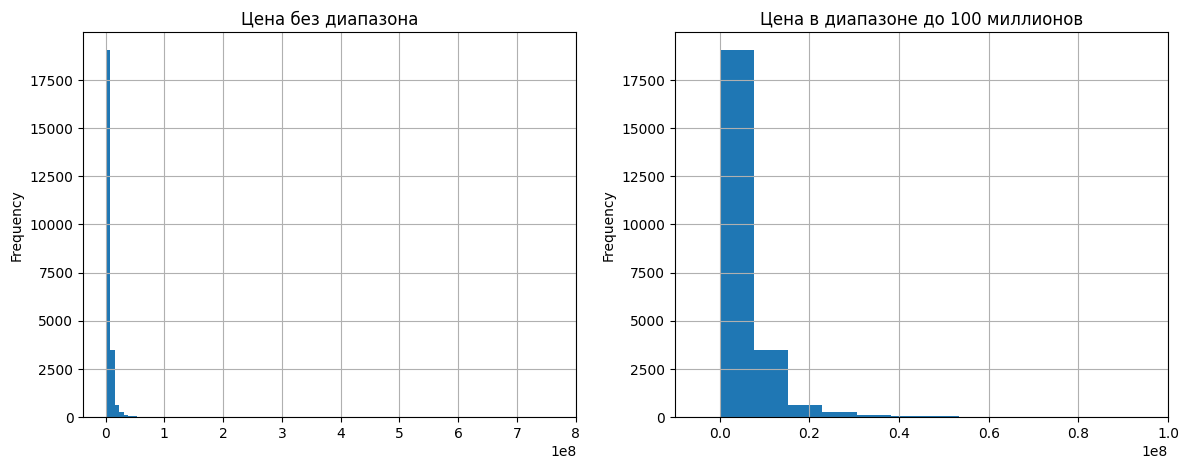

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

df["last_price"].plot(kind="hist", bins=100, grid=True, ax=axs[0], title="Цена без диапазона");
df["last_price"].plot(kind="hist", bins=100, grid=True, ax=axs[1], title="Цена в диапазоне до 100 миллионов").set_xlim(-10000000, 100000000);

plt.show()

Видим что основная масса цен находиться до 40 миллионов.

In [8]:
print(f'''Минимальная цена за квартиру - {df["last_price"].quantile(0.02):_.0f}''')
print(f'''Максимальная цена за квартиру - {df["last_price"].quantile(0.99):_.0f}''')

Минимальная цена за квартиру - 1_300_000
Максимальная цена за квартиру - 36_000_000


In [9]:
df[(df["last_price"] > df["last_price"].quantile(0.02)) & (df["last_price"] < df["last_price"].quantile(0.99))].shape[0] / df.shape[0]

0.9694501877716359

Возмём наиболее соответствующие здравому смыслу цены на квартиры. Минимальная в 1.3 миллиона, а максимальная в 36 миллионов. Думаю для Санкт-Петербурга и его окрестностей это адекватные цены, тем более это 97 % всех квартир. Всё остальное будем считать выбросами и удалим, заполнять средним или медианой нельзя, иначе это исказит реальные выводы, ведь эти квартиры в реальности могут иметь абсолютно разные цены, но достать эту информацию не возможно. Выбросы появились вероятно из-за ошибок в заполнении, может были проставлены лишние цифры или сбой при выгрузке.

In [10]:
df["rooms"].value_counts().sort_index()

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: count, dtype: int64

в **rooms** есть 197 нулевых значений, скорее всего это квартиры-студии. Оставляем как есть.

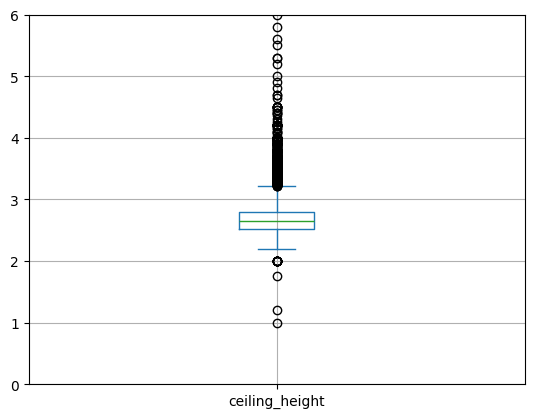

In [14]:
df["ceiling_height"].plot(kind="box", grid=True).set_ylim(0, 6);

In [12]:
df["ceiling_height"].value_counts().sort_index(ascending=False)

ceiling_height
100.00     1
32.00      2
27.50      1
27.00      8
26.00      1
          ..
2.20       1
2.00      11
1.75       1
1.20       1
1.00       1
Name: count, Length: 183, dtype: int64

In [13]:
df.query("ceiling_height < 2.1 | ceiling_height > 4")["ceiling_height"].count()

89

В **ceiling_height** есть всего 89 значений которые или меньше 2.1 метра или выше 4. Вероятно тут ошибка заполнения или выгрузки. В среднем потолки идут от 2.2 метра до 3.2, в редких случаях чуть ниже или чуть выше этого показателя. Просто заменим медианой.

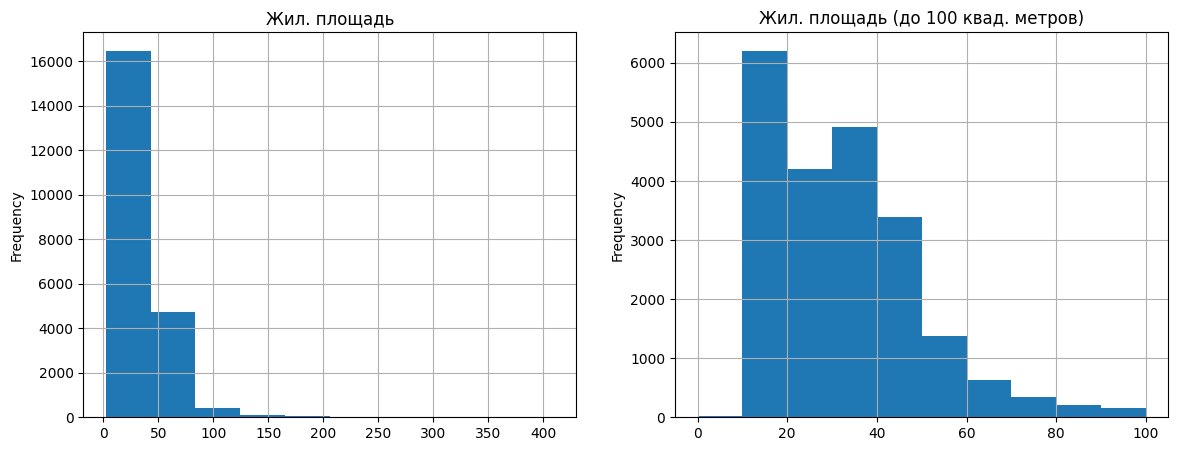

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

df["living_area"].plot(kind="hist", grid=True, ax=axs[0], title="Жил. площадь");
df["living_area"].plot(kind="hist", range=(0, 100), grid=True, ax=axs[1], title="Жил. площадь (до 100 квад. метров)");

plt.show()

In [73]:
df.query("living_area < 10")["living_area"].count()

25

В жилой площади есть нереальные значения меньше 10 квадратных метров (25 значений), будем считать их выбросами, заполнять не будем потому что можно исказить результаты исследования, удалим их. Основные значения жилой площади от 10 до примерно 75 квадратных метров, есть большие значения, скорее всего это более дорогие или элитные дома.

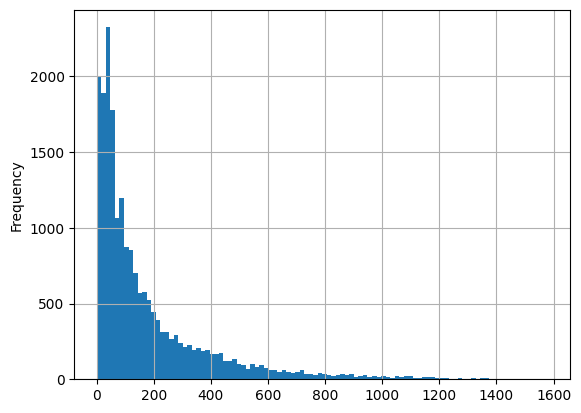

In [99]:
df["days_exposition"].plot(kind="hist", grid=True, bins=100);

В основном обявления висели в приложении от 1 до 600 дней (чуть больше полтора года). Есть и выбросы, где обявления висели больше 1000 дней. Возможно клиенты забывали закрывать обьявления после того как продали квартиру. Это не самый важный показатель, удалять выбросы нельзя, вместе с ними удалятся важные параметры, будем игнорировать его.

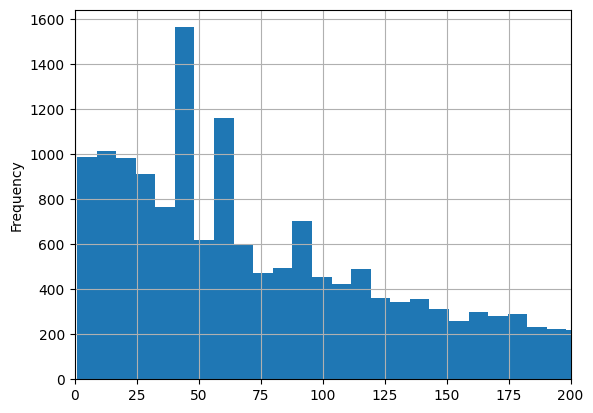

In [100]:
df["days_exposition"].plot(kind="hist", grid=True, bins=200).set_xlim(0, 200);

Уменьшили диапазон до 200 дней. Два явных пика на 45 и 60 днях. Возможно в приложении стоят настройки в эти дни автоматически закрывать обьявления.

## Что нужно исправить:

| <span style="color:orange">1. Странные значения</span> | <span style="color:orange">2. Пропуски</span> | <span style="color:orange">3. Замена типа данных</span> | <span style="color:orange">4. Удаление дубликатов</span> | <span style="color:orange">5. Категоризация</span> |
| - | - | - | - | - |
| Исправить названия столбцов || **first_day_exposition**: заменить тип данных на datetime64. |
| **locality_name**: привести к нижнему регистру и избавиться от буквы "ё" в словах || **floors_total**: заменить на int64 |
| **last_price**: Проверить на выбросы и скорректировать значения || **is_apartment**: проверить, возможно есть NA |
| **last_price**: удалить выбросы, сделав срез по данным между 2 и 99 квантилем || **balcony**: поменять на Int64 |
| **ceiling_height**: заменить выбросы медианой || **parks_around_3km** и **ponds_around_3km**: поменять на Int64 |
| **living_area**: убрать выбросы меньше 10 || **days_exposition**: поменять на Int64 |